### Imports

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import sys
from sklearn.ensemble import RandomForestClassifier

In [20]:
sys.path.append(os.path.abspath('../../src'))

from helper_functions.path_resolver import DynamicPathResolver
from helper_functions import visualization as visual

### Paths

In [21]:
resolver = DynamicPathResolver(marker="README.md")
structure = resolver.structure

preprocessed_data_path = structure.data.preprocessed.data_for_meta.meta_csv

Project Root: c:\Users\ilian\Documents\Projects\git_projects\university\phishing_detection


### Load meta data

In [22]:
meta_df = pd.read_csv(preprocessed_data_path)

In [23]:
feature_columns = [col for col in meta_df.columns if col not in ['labels', 'language']]
print("Feature columns:", feature_columns)

Feature columns: ['label', 'word_count', 'char_count', 'special_char_count', 'number_count', 'phishing_term_count', 'avg_word_length', 'uppercase_word_count', 'url_count', 'html_tag_count', 'repeated_char_count', 'suspicious_domain_count', 'email_address_count', 'readability_score', 'exclamation_count', 'question_count']


### Visualization

##### Histograms

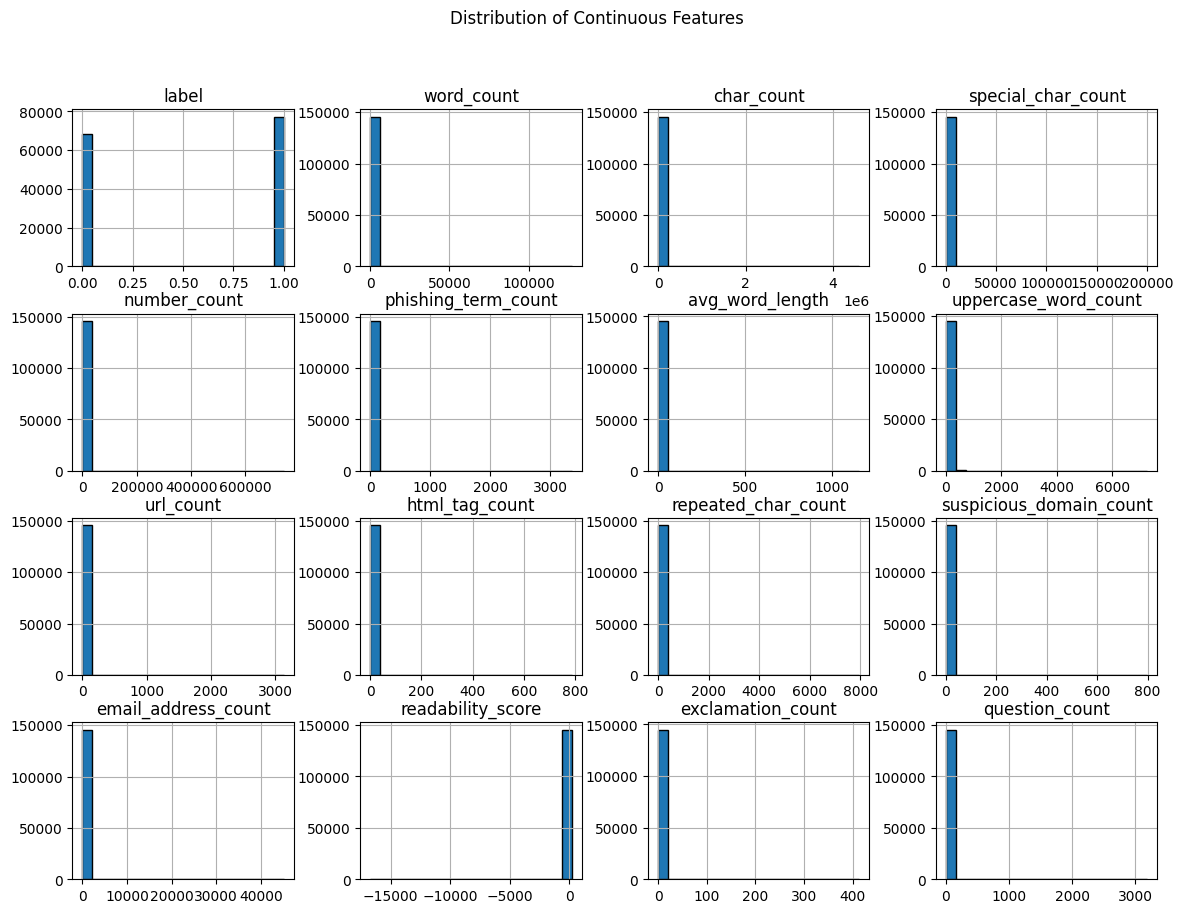

In [24]:
meta_df[feature_columns].hist(bins=20, figsize=(14, 10), edgecolor='black')
plt.suptitle('Distribution of Continuous Features')
plt.show()

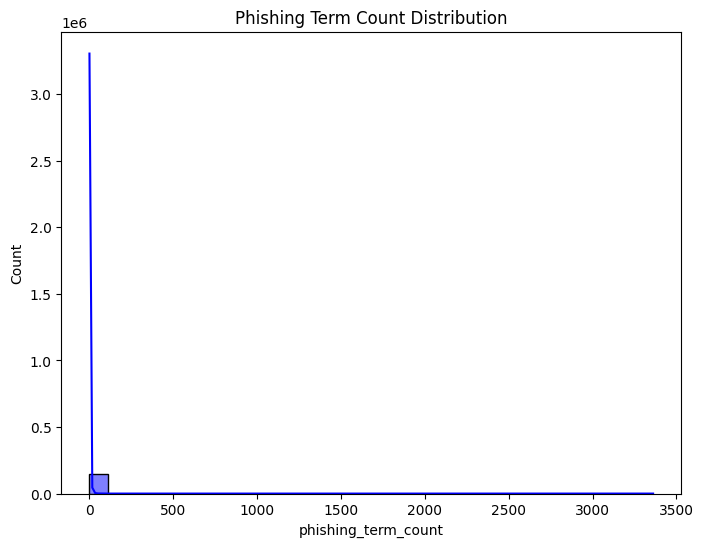

In [25]:
plt.figure(figsize=(8, 6))
sns.histplot(meta_df['phishing_term_count'], kde=True, bins=30, color='blue')
plt.title('Phishing Term Count Distribution')
plt.show()

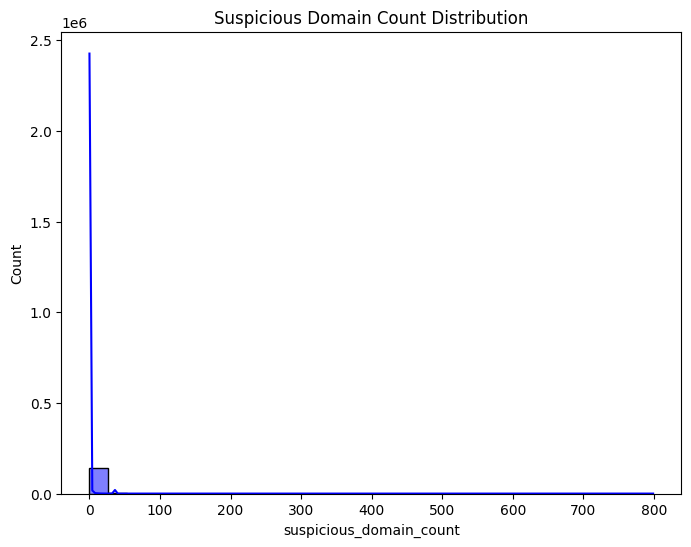

In [26]:
plt.figure(figsize=(8, 6))
sns.histplot(meta_df['suspicious_domain_count'], kde=True, bins=30, color='blue')
plt.title('Suspicious Domain Count Distribution')
plt.show()

##### Boxplot

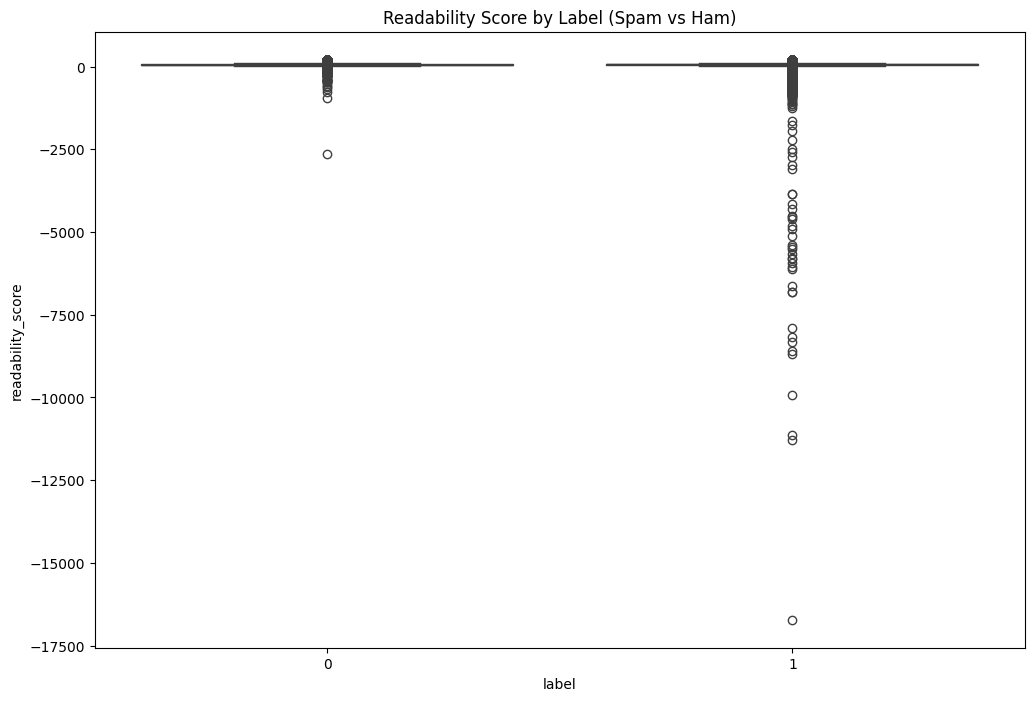

In [28]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='label', y='readability_score', data=meta_df)
plt.title('Readability Score by Label (Spam vs Ham)')
plt.show()

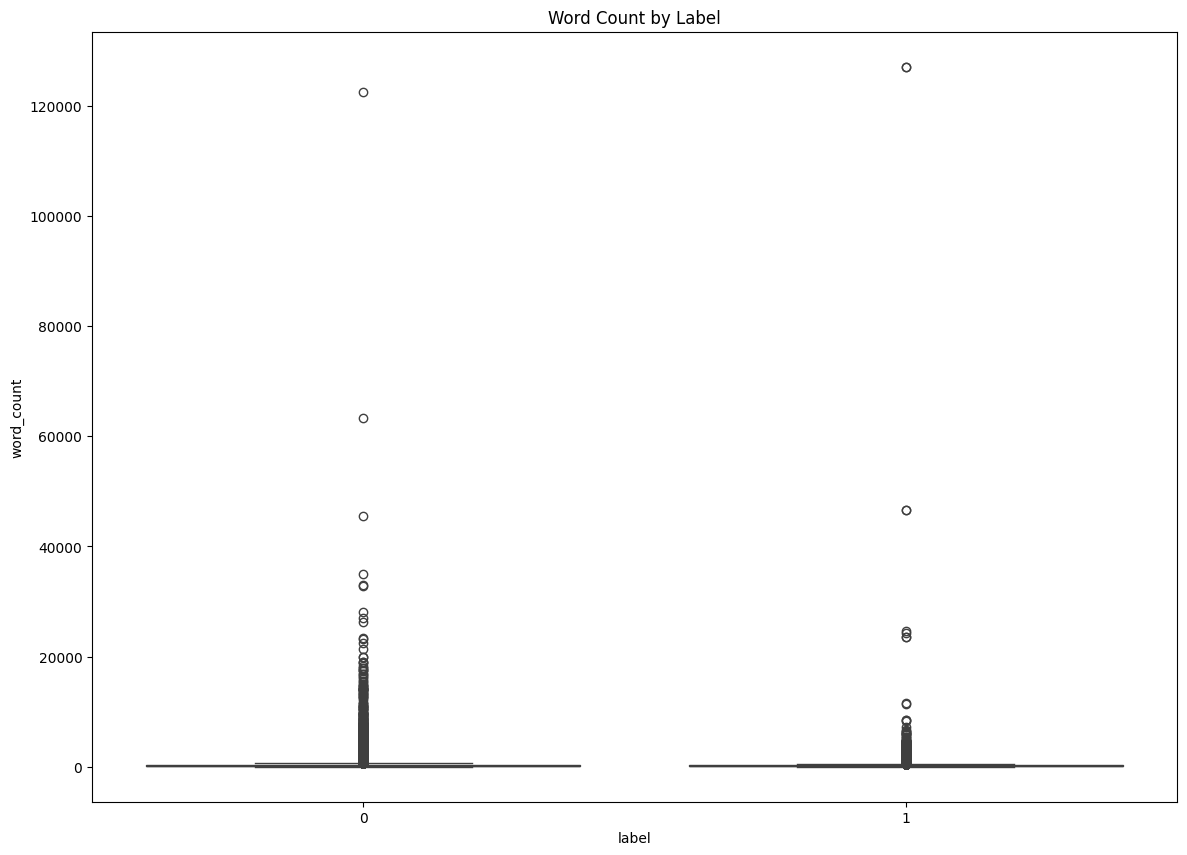

In [30]:
plt.figure(figsize=(14, 10))
sns.boxplot(data=meta_df, x='label', y='word_count')
plt.title('Word Count by Label')
plt.show()

##### Pairplot for feature relationships

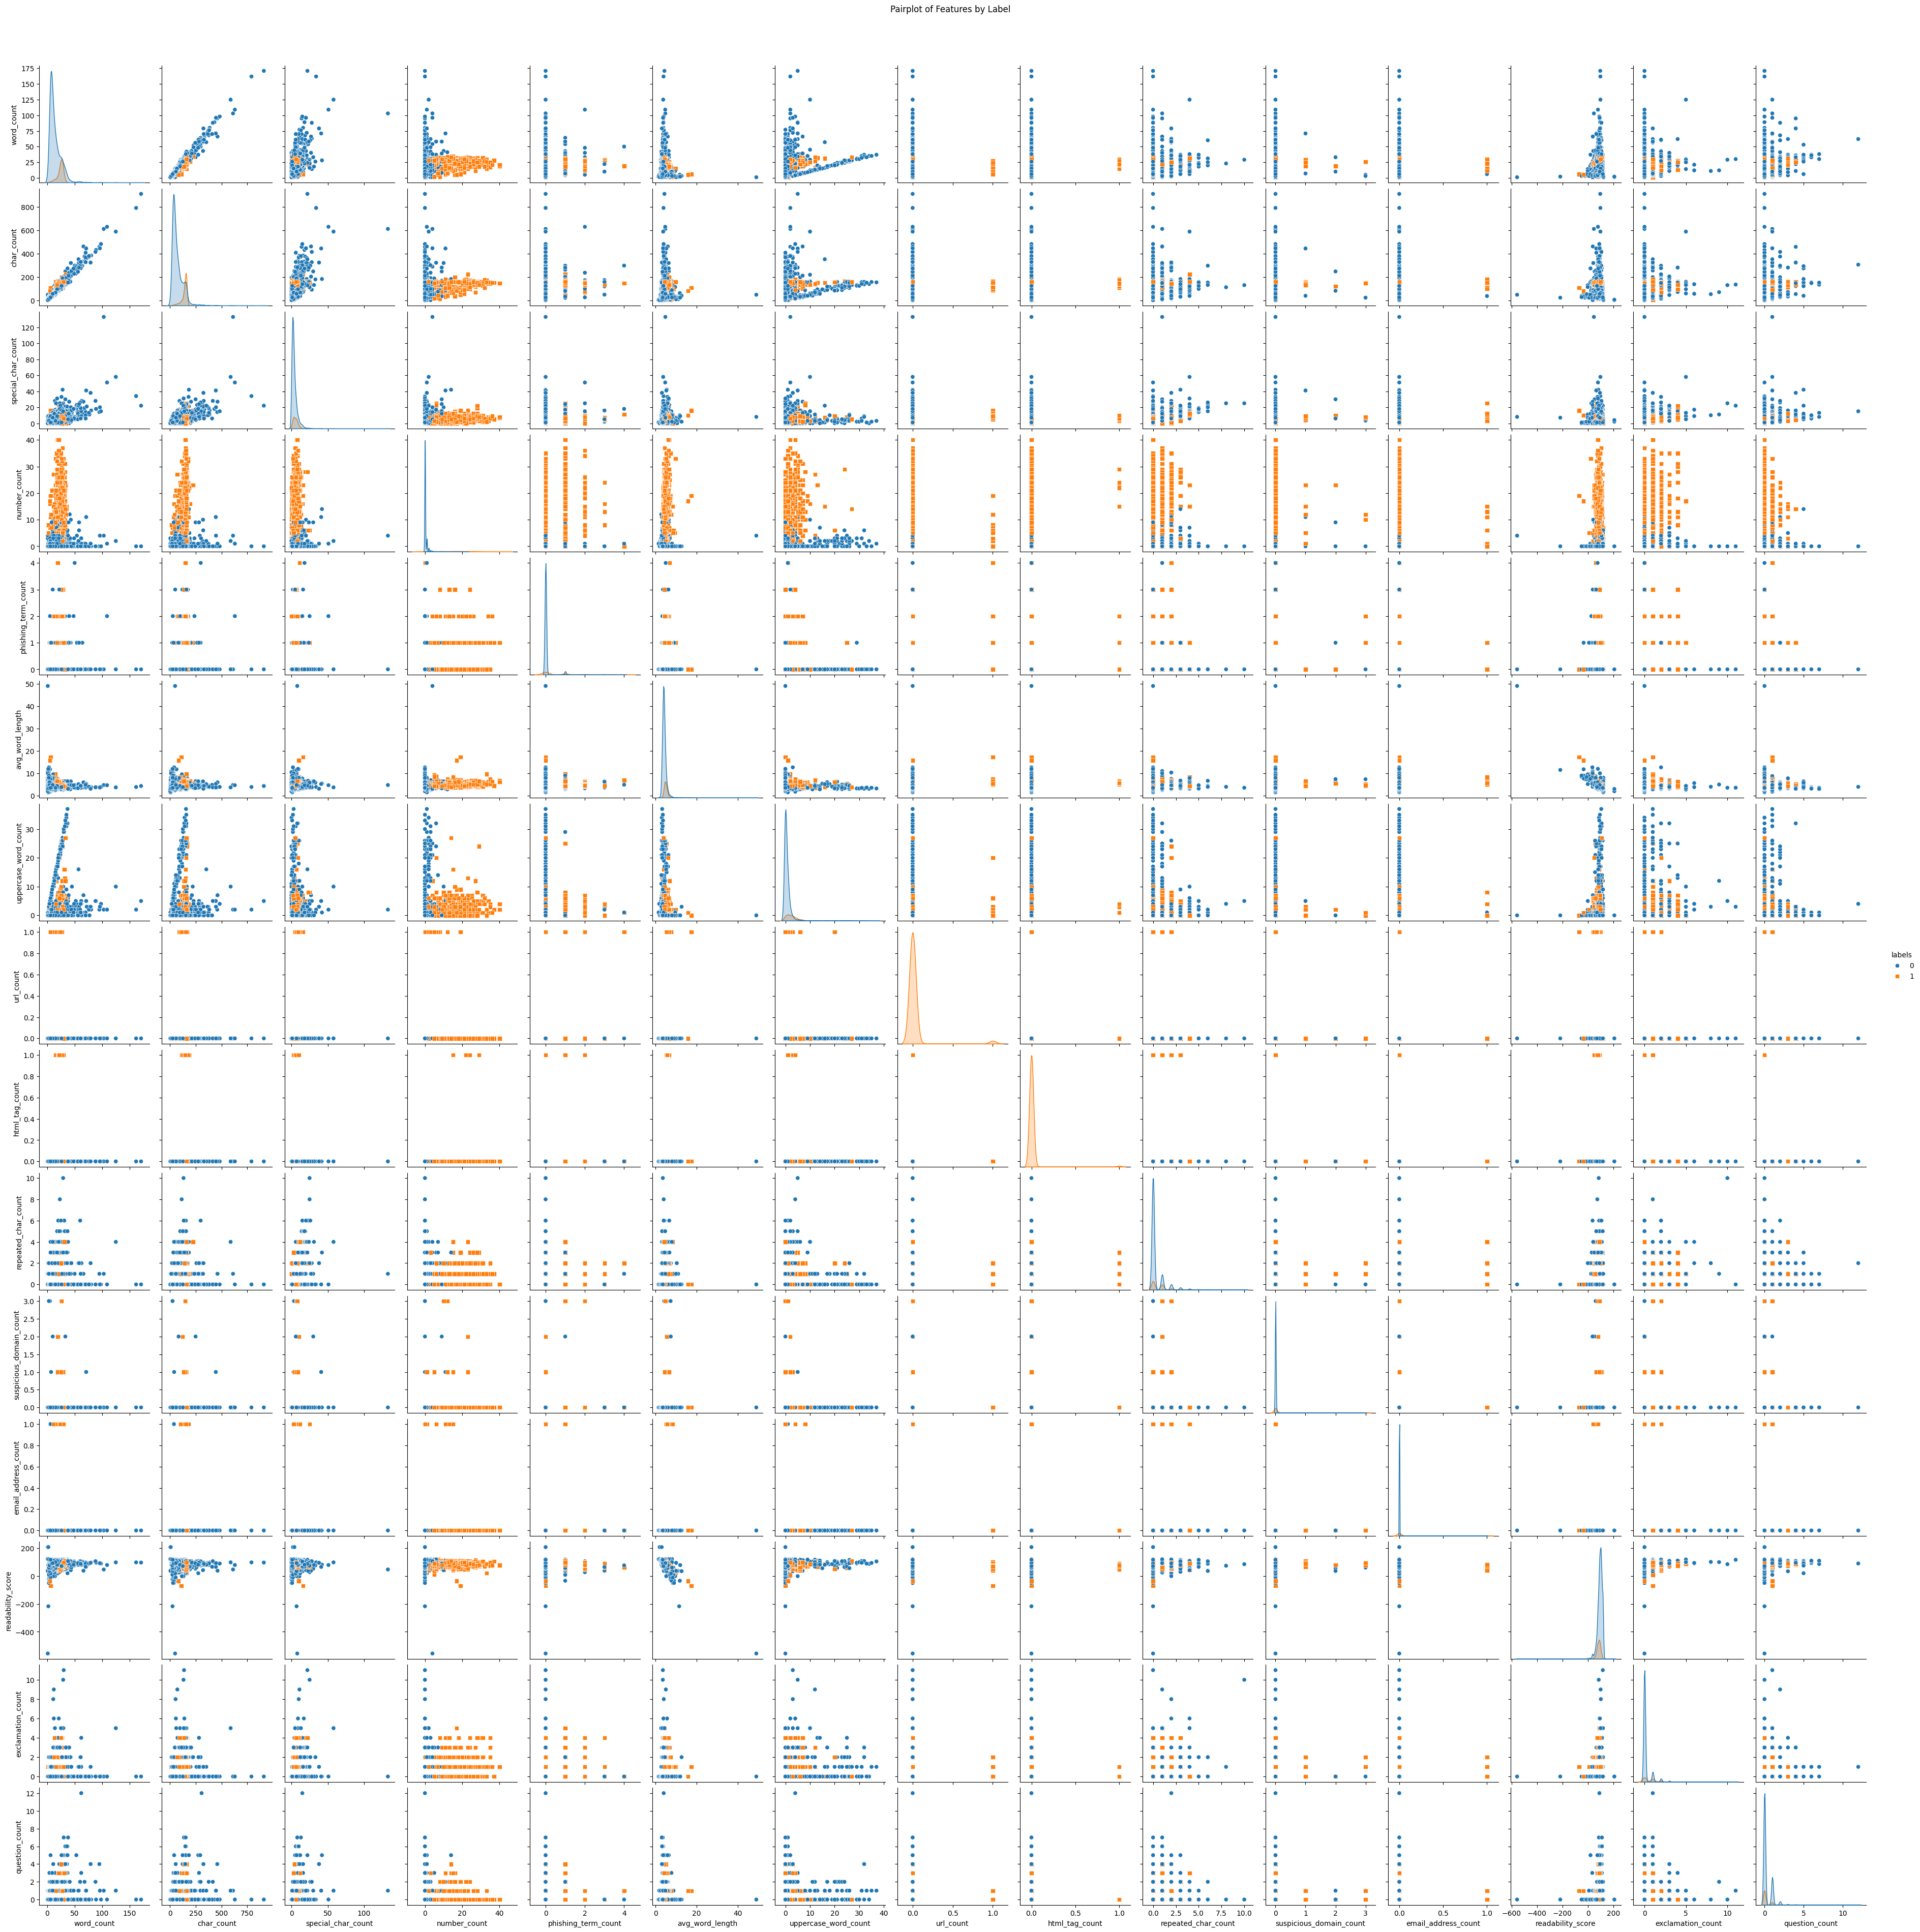

In [ ]:
sns.pairplot(meta_df[feature_columns + ['label']], hue="label", markers=["o", "s"])
plt.suptitle('Pairplot of Features by Label', y=1.02)
plt.show()

##### Countplots

Class Distribution (Legit vs. Phishing):
Legit: 68452 (47.00%)
Phishing: 77187 (53.00%)


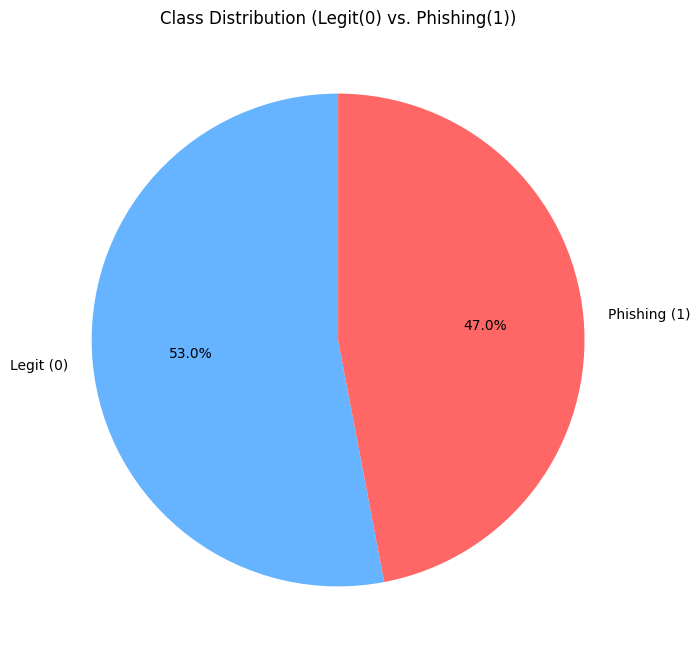

In [31]:
# Count the number of occurrences of each label
class_counts = meta_df['label'].value_counts()
class_percentages = (class_counts / len(meta_df)) * 100

print("Class Distribution (Legit vs. Phishing):")
print(f"Legit: {class_counts.get(0, 0)} ({class_percentages.get(0, 0):.2f}%)")
print(f"Phishing: {class_counts.get(1, 0)} ({class_percentages.get(1, 0):.2f}%)")

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=['Legit (0)', 'Phishing (1)'], autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff6666'])
plt.title('Class Distribution (Legit(0) vs. Phishing(1))')
plt.show()


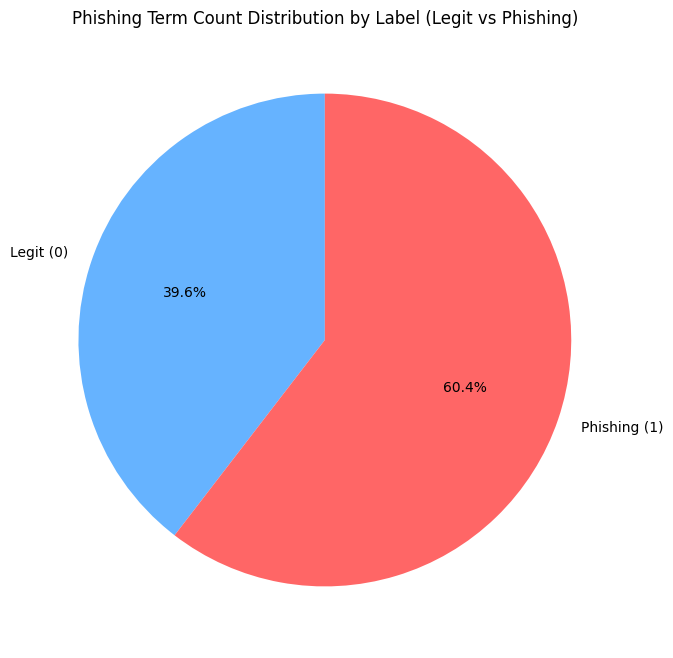

In [33]:
phishing_term_counts_by_label = meta_df.groupby('label')['phishing_term_count'].sum()

plt.figure(figsize=(8, 8))
plt.pie(phishing_term_counts_by_label, labels=['Legit (0)', 'Phishing (1)'], autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff6666'])
plt.title('Phishing Term Count Distribution by Label (Legit vs Phishing)')
plt.show()

##### Density plot

C:\Users\ilian\AppData\Local\Temp\ipykernel_26172\1499285360.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(meta_df['word_count'], shade=True, color='green')


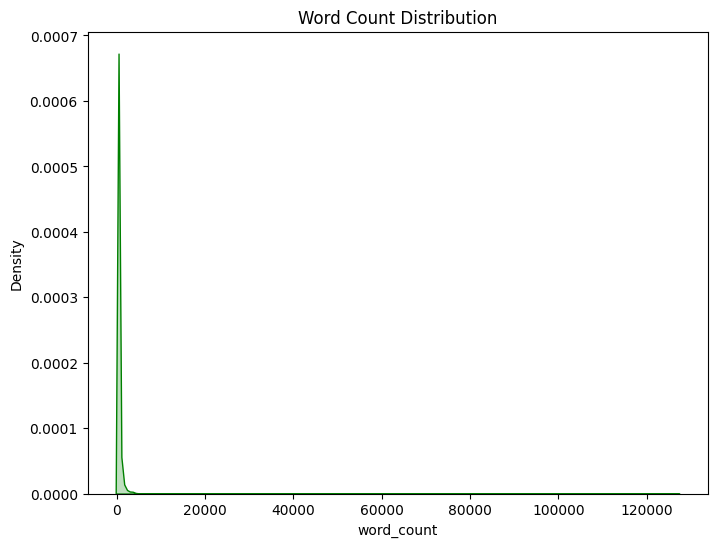

In [34]:
plt.figure(figsize=(8, 6))
sns.kdeplot(meta_df['word_count'], shade=True, color='green')
plt.title('Word Count Distribution')
plt.show()

##### Violin Plot

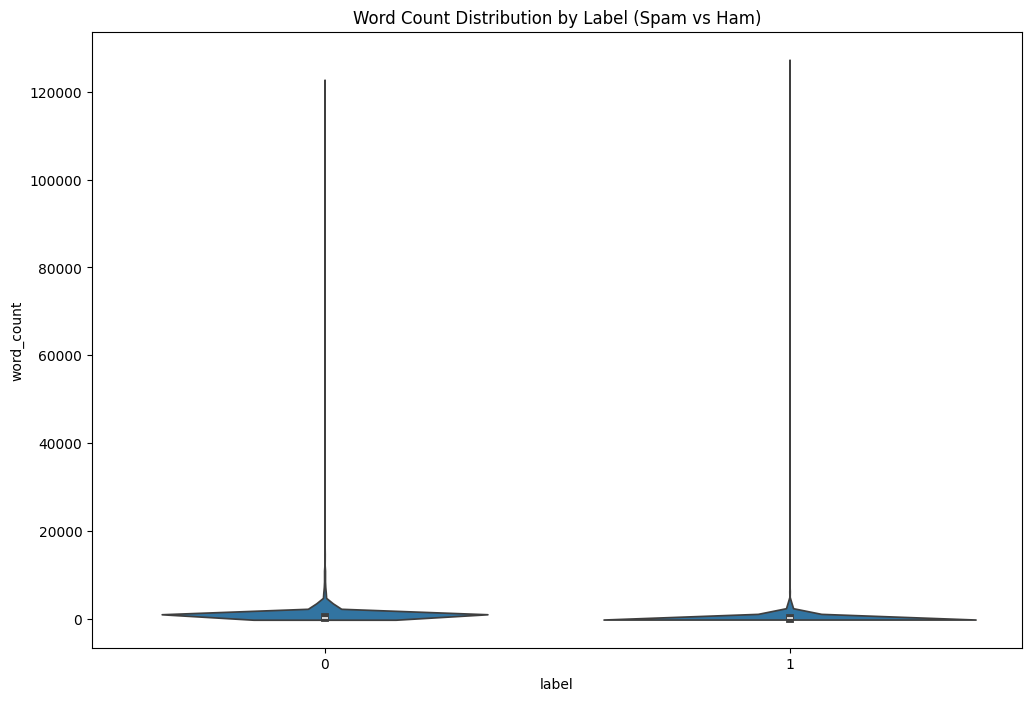

In [36]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='label', y='word_count', data=meta_df)
plt.title('Word Count Distribution by Label (Spam vs Ham)')
plt.show()

##### Feature importance

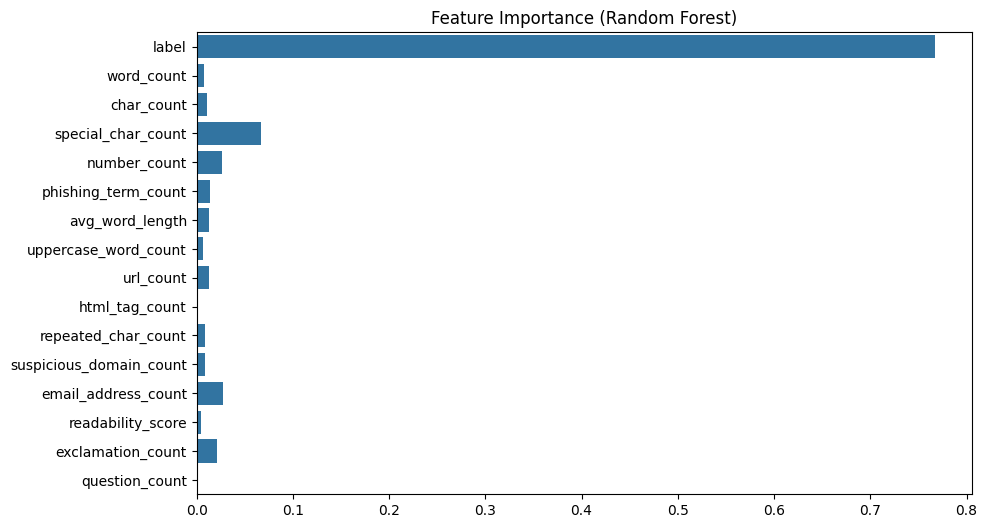

In [38]:
from sklearn.ensemble import RandomForestClassifier

# Prepare the data
X = meta_df[feature_columns]
y = meta_df['label']

# Train RandomForest model
model = RandomForestClassifier()
model.fit(X, y)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=model.feature_importances_, y=feature_columns)
plt.title('Feature Importance (Random Forest)')
plt.show()

##### Correlation matrix

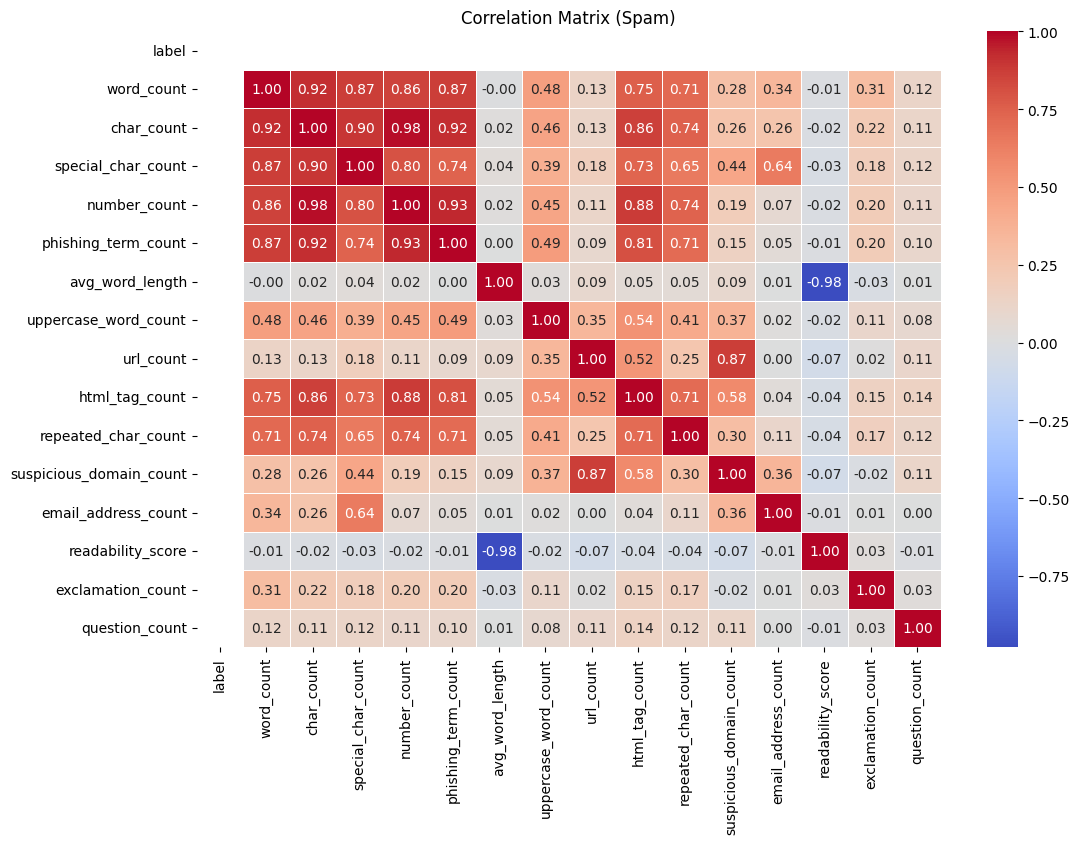

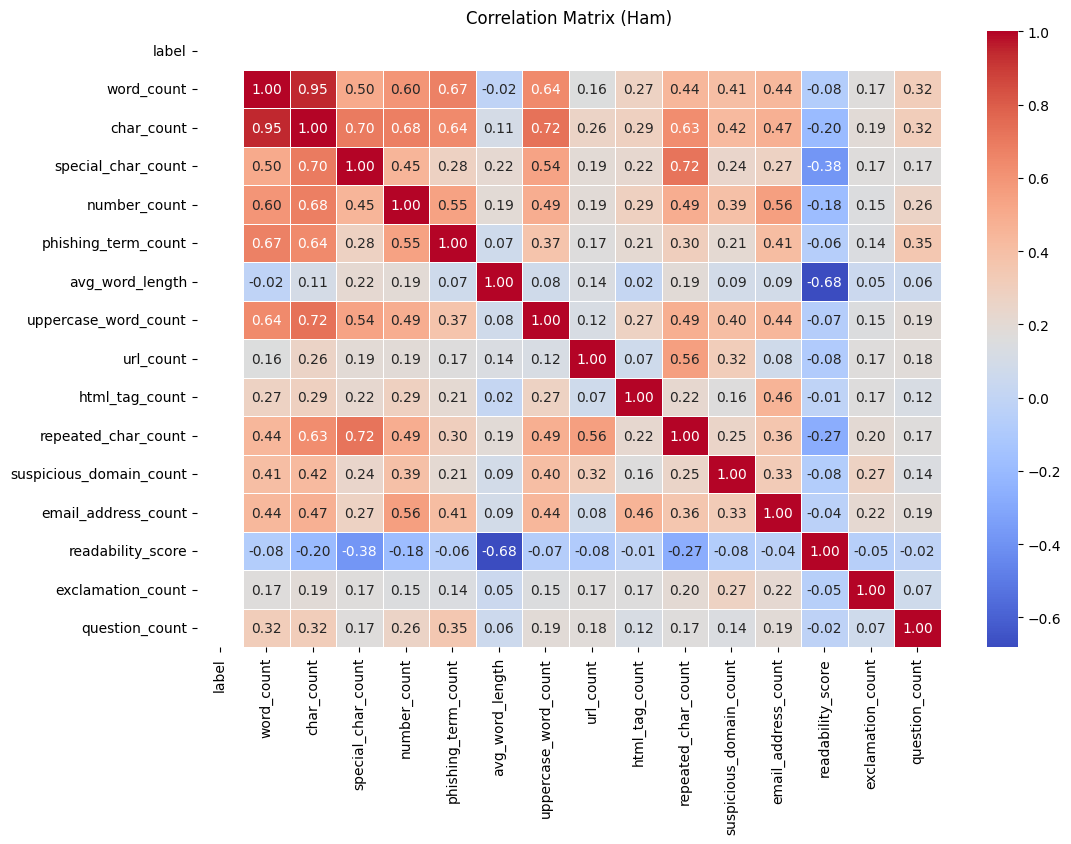

In [39]:
# Filter the data by labels (Spam vs. Ham)
spam_df = meta_df[meta_df['label'] == 1]
ham_df = meta_df[meta_df['label'] == 0]

# Correlation matrix for Spam
corr_spam = spam_df[feature_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_spam, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (Spam)')
plt.show()

# Correlation matrix for Ham
corr_ham = ham_df[feature_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_ham, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (Ham)')
plt.show()